In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.


In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [ ]:
# 파이토치 관련 라이브러리
import torch
from torchviz import make_dot

In [ ]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [ ]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

## 3.4 경사 하강법 구현

In [ ]:
def L(u, v):
    return 3 * u**2 + 3 * v**2 - u*v + 7*u - 7*v + 10
def Lu(u, v):
    return 6* u - v + 7
def Lv(u, v):
    return 6* v - u - 7

u = np.linspace(-5, 5, 501)
v = np.linspace(-5, 5, 501)
U, V = np.meshgrid(u, v)
Z = L(U, V)

In [ ]:
# 경사 하강법 시뮬레이션
W = np.array([4.0, 4.0])
W1 = [W[0]]
W2 = [W[1]]
N = 21
alpha = 0.05
for i in range(N):
    W = W - alpha *np.array([Lu(W[0], W[1]), Lv(W[0], W[1])])
    W1.append(W[0])
    W2.append(W[1])

In [ ]:
n_loop=11

WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_zlim(0,250)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('loss')
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

## 3.5 데이터 전처리
다섯명의 신장과 체중 데이터를 사용한다.  
1차 함수를 사용해 신장으로 체중을 예측하는 경우, 최적 직선을 구하는 것이 목적이다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# 코드 3-1: 다섯 쌍의 학습 데이터
# 샘플 데이터 선언 (신장, 체중)
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])

print(sampleData1)

In [ ]:
# 코드 3-2: 학습 데이터를 입력 데이터와 정답 데이터로 분할
# 머신러닝 모델에서 사용하기 위해, 신장을 변수 x로, 체중을 변수 y로 함
x = sampleData1[:,0] # 모든 행의 0번째 열(신장)을 x로 지정
y = sampleData1[:,1] # 모든 행의 1번째 열(체중)을 y로 지정


In [ ]:
# 코드 3-3: 산포도 출력
# 산포도 출력 확인
plt.scatter(x, y, c='k', s=50) # x, y 데이터를 검은색(k) 점으로 그래프에 표시
plt.xlabel('$x$: 신장 (cm)')    # x축 라벨 설정
plt.ylabel('$y$: 체중 (kg)')    # y축 라벨 설정
plt.title('신장과 체중의 관계')    # 그래프 제목 설정
plt.show()                       # 그래프를 화면에 표시

### 데이터 변환
머신러닝 모델에서 데이터는 0에 가까운 값을 갖는 것이 바람직하다.
따라서, x, y 모두 평균값이 0이 되도록 평행이동시켜서 새로운 좌표계를 X, Y로 한다.

In [ ]:
# 코드 3-4: 데이터 변환
X = x - x.mean() # x의 모든 요소에서 x의 평균값을 뺌
Y = y - y.mean() # y의 모든 요소에서 y의 평균값을 뺌

In [ ]:
# 산포도를 통해 결과 확인
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('데이터 가공 후 신장과 체중의 관계')
plt.show()

## 3.6 예측 계산

In [ ]:
# 코드 3-5: X와 Y를 텐서 변수로 변환
# X와 Y를 텐서 변수로 변환
X = torch.tensor(X).float() # NumPy 배열 X를 float 타입의 파이토치 텐서로 변환
Y = torch.tensor(Y).float() # NumPy 배열 Y를 float 타입의 파이토치 텐서로 변환

# 결과 확인
print(X)
print(Y)

In [ ]:
# 코드 3-6: W와 B의 정의
# 파라미터 정의
# W와 B는 경사 계산을 위해, requires_grad=True로 설정함
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

print(W)
print(B)

In [ ]:
# 코드 3-7: 예측 값 Yp의 계산
# 예측 함수는 1차 함수
def pred(X):
  return W * X + B

# 예측 값 계산
Yp = pred(X)

# 결과 확인
print(Yp)

In [ ]:
# 코드 3-8: 예측 값 Yp의 계산 그래프
# 예측 값의 계산 그래프 표시
params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

## 3.7 손실 계산

In [ ]:
# 코드 3-9: 손실 함수(mse)의 정의
# 평균 제곱 오차 손실함수
def mse(Yp, Y):
  loss = ((Yp - Y)**2).mean()
  return loss

In [ ]:
# 코드 3-10: 손실 계산
# 손실 계산
loss = mse(Yp, Y)

# 결과 표시
print(loss)

In [ ]:
# 코드 3-11: 손실 계산 그래프 출력
# 손실 계산 그래프 출력
params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

## 3.8 경사 계산

In [ ]:
# 코드 3-12: 손실(loss)에 대한 W와 B의 경사 계산 결과
# 경사 계산
loss.backward()

# 경삿값 확인
print(W.grad)
print(B.grad)

## 3.9 파라미터 수정

In [ ]:
# 코드 3-13: 파라미터 값을 계산한 그대로 갱신하는 경우 (오류 발생)
# 학습률 정의
lr = 0.001

In [ ]:
# 이 코드는 에러를 발생시킵니다. (경사 계산이 필요한 변수(`W`, `B`)에 대해 'in-place' 연산(자신의 값을 직접 수정하는 연산, 예: `-=`)을 수행하려고 했다)
try:
    # 경사를 기반으로 파라미터 수정
    W -= lr * W.grad
    B -= lr * B.grad
except RuntimeError as e:
    print(e)

W와 B는 한번 계산이 끝났기 때문에, 이 상태로 값의 갱신은 불가능하다.
따라서, 다음과 같이 수정해야 한다.

In [ ]:
# 코드 3-14: 올바른 파라미터 수정 방법
# with torch.no_grad() 작성 필요
with torch.no_grad():
    # 경사를 기반으로 파라미터 수정
    W -= lr * W.grad
    B -= lr * B.grad

# 계산이 끝난 경사값을 초기화함
W.grad.zero_()
B.grad.zero_()

In [ ]:
# 코드 3-15: W, B의 값과 경삿값 확인
# 파라미터와 경삿값 확인
print(W)
print(B)
print(W.grad)
print(B.grad)

원래 값은 모두 1.0이기 때문에, W는 미소량이 증가, B는 미소량이 감소했음을 확인할 수 있다.
이 계산을 반복해서 최적의 W와 B를 구하는 것이 경사 하강법이다.

## 3.10 반복 계산

In [ ]:
# 코드 3-16: 반복 계산의 초기화 처리
# 초기화
# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [ ]:
history

In [ ]:
# 코드 3-17: 루프 처리 구현
# 루프 처리
for epoch in range(num_epochs):
    # 예측 계산
    Yp = pred(X)

    # 손실 계산
    loss = mse(Yp, Y) # 예측값, 실제값 비교 >> 손실 계산

    # 경사 계산
    loss.backward()

    # 경사를 기반으로 파라미터 수정
    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad

    # 경삿값 초기화
    W.grad.zero_()
    B.grad.zero_()

    # 손실 기록
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch} loss = {loss:.4f}')

## 3.11 결과 평가

In [ ]:
# 코드 3-18: 최종 파라미터 값과 손실 값 출력
# 최종 파라미터 값
print('W', W.data.numpy()) # W의 데이터 값을 numpy 배열로 변환하여 출력
print('B', B.data.numpy()) # B의 데이터 값을 numpy 배열로 변환하여 출력

# 손실 확인
print(f'초기상태: 손실 : {history[0,1]:.4f}') # history 배열의 첫 번째 행, 두 번째 열의 값(초기 손실)을 출력
print(f'최종상태: 손실 : {history[-1,1]:.4f}') # history 배열의 마지막 행, 두 번째 열의 값(최종 손실)을 출력

In [ ]:
# 코드 3-19: 손실 값을 통한 학습 곡선의 출력
# 학습 곡선 출력(손실)
plt.plot(history[:,0], history[:,1], 'b') # X축: history의 모든 행의 첫 번째 열(반복 횟수), Y축: 모든 행의 두 번째 열(손실)
plt.xlabel('반복 횟수') # X축 레이블 설정
plt.ylabel('손실') # Y축 레이블 설정
plt.title('학습 곡선(손실)') # 그래프 제목 설정
plt.show() # 그래프를 화면에 표시

### 산포도에 회귀 직선을 동시에 출력함

In [ ]:
# x의 범위를 구함(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 이와 대응하는 예측값 y를 구함
Y_range = pred(X_range)
print(Y_range.data)

# 코드 3-20: 산포도와 상관 직선 동시 출력
# 그래프 출력
plt.scatter(X, Y, c='k', s=50) # 원본 데이터의 산포도 (검은 점)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_range.data, Y_range.data, lw=2, c='c') # 학습된 파라미터로 그린 직선 (청록색)
plt.title('신장과 체중의 상관 직선(가공 후)')
plt.show()

### 가공 전 데이터로 회귀 직선 출력

In [ ]:
# y좌표와 x좌표 값 계산

x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

# 그래프 출력

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 전)')
plt.show()

## 3.12 최적화 함수와 step 함수 이용하기

In [ ]:
# 코드 3-22: 최적화 함수를 이용한 초기화 처리
# 초기화
# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500
# 실무) epochs 10,000번 이상 설정하고,
# 조기종료(early-stopping)활용(loss가 더이상 떨어지지 않을때, 즉 성능개선이 없을 때)

# 학습률
lr = 0.001
# 하이퍼파라미터(임의 설정)
# >> [0.01,0.001,0.0001] 데이터에 따라 결과값이 다르기 때문에 관련 데이터 연구 표준을 활용
# for 반복문을 활용하여 최적의 하이퍼파라미터 찾아서 사용함

# optimizer로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim # optim 라이브러리 import
optimizer = optim.SGD([W, B], lr=lr) # SGD 옵티마이저 생성. 관리할 파라미터([W, B])와 학습률(lr)을 알려줌

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [ ]:
# 코드 3-23: 최적화 함수를 이용한 반복 계산
# 루프 처리
for epoch in range(num_epochs):
    # 예측 계산
    Yp = pred(X)

    # 손실 계산
    loss = mse(Yp, Y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step() # 옵티마이저가 알아서 W와 B를 업데이트함

    # 경삿값 초기화
    optimizer.zero_grad() # 옵티마이저에 연결된 파라미터들의 경사도를 0으로 초기화

    # 손실 기록 (10회마다)
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch} loss = {loss.item():.4f}')

In [ ]:
# 코드 3-24: 최적화 함수를 적용했을 때의 최종 결과

print('W', W.data.numpy())
print('B', B.data.numpy())

# 손실 확인
print(f'초기상태: 손실 : {history[0,1]:.4f}')
print(f'최종상태: 손실: {history[-1,1]:.4f}')

In [ ]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

3.7의 결과와 비교해보면 동일한 것을 알 수 있다.
따라서, step 함수는 다음의 코드와 같은 로직을 수행하고 있다.

```py3

 with torch.no_grad():
        # 파라미터 수정
        # 프레임워크를 사용하는 경우는 step 함수가 이를 대신함
        W -= lr * W.grad
        B -= lr * B.grad
```

### 최적화 함수 튜닝

In [ ]:
# 코드 3-26 & 3-27: 최적화 함수 튜닝 및 비교 그래프 출력

# --- 기본값 SGD로 학습한 결과 (위에서 얻음) ---
history_default = history

# --- Momentum을 적용하여 다시 학습 ---
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# optimizer에 momentum=0.9 옵션 추가
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9) # momentum 옵션 추가
history_momentum = np.zeros((0, 2)) # 비교를 위해 새로운 history 변수 생성

In [ ]:
# 학습 루프 (위와 동일)
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history_momentum = np.vstack((history_momentum, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

In [ ]:
# 학습 곡선(손실) 비교 출력
plt.plot(history_default[:,0], history_default[:,1], 'c', label='기본값 설정') # 기본값 SGD 결과 (청록색)
plt.plot(history_momentum[:,0], history_momentum[:,1], 'k', label='momentum=0.9') # momentum 적용 결과 (검은색)
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.legend() # 범례 표시
plt.title('학습 곡선(손실)')
plt.show()

## APPENDIX 국소적 최적화 문제

In [ ]:
def f(x):
    return x * (x+1) * (x+2) * (x-2)

In [ ]:
x = np.arange(-3, 2.7, 0.05)
y = f(x)

plt.plot(x, y)
plt.axis('off')
plt.show()

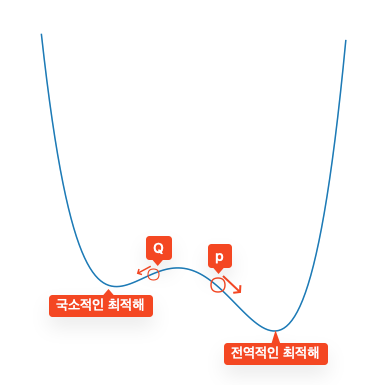

이 그림은 손실 함수(Loss Function)의 지형을 보여줍니다. X축은 모델의 가중치(파라미터) 값, Y축은 해당 가중치 값에서의 오류(손실) 크기를 나타냅니다. 우리의 목표는 Y값이 가장 낮은, 즉 그래프의 가장 깊은 지점을 찾는 것입니다.

- P 지점에서 출발:
  이 그림에서, P 지점을 출발해서 경사 하강법을 적용하면, 경사를 따라 자연스럽게 가장 낮은 지점인 전역적인 최적해를 쉽게 발견하게 될 것입니다.
    
- Q 지점에서 출발:
  그러나 운이 나빠서 Q 지점에서 출발하는 경우, 경사를 따라 내려가다 보면 국소적인 최적해로 먼저 빠져버릴 가능성이 있습니다. 이 지점에 도달하면, 주변의 모든 방향이 오르막길이므로 더 이상 움직이지 못하고 탐색을 멈추게 됩니다.

이처럼 출발 지점에 따라 결과가 달라지는 것이 바로 국소적 최적화 문제의 핵심입니다.